### imports

In [2]:
import torch as tor
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

### create data

In [6]:
def create_data(nperClust = 100):
    blur = 1
    A = [4, 2]
    B = [1, 1]
    clsA = [
        A[0] + np.random.randn(nperClust) * blur,
        A[1] + np.random.randn(nperClust) * blur,
    ]
    clsB = [
        B[0] + np.random.randn(nperClust) * blur,
        B[1] + np.random.randn(nperClust) * blur,
    ]
    label_np = np.vstack((np.zeros((nperClust, 1)), np.ones((nperClust, 1))))
    data_np = np.hstack((clsA, clsB)).T
    data = tor.tensor(data_np, dtype=tor.float)
    label = tor.tensor(label_np, dtype=tor.float)
    return data, label

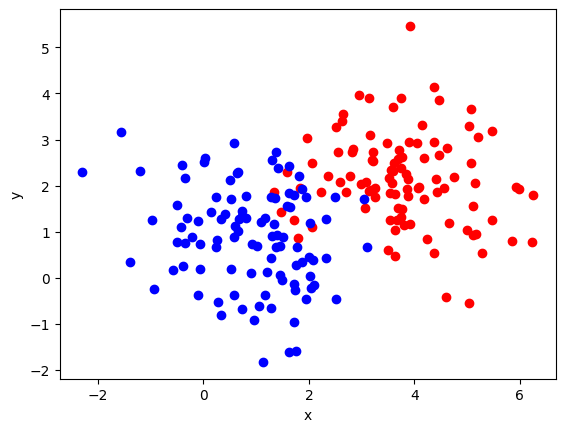

In [23]:
# plot the data
data, label = create_data()
plt.scatter(data[:100, 0], data[:100, 1], c="r")
plt.scatter(data[100:, 0], data[100:, 1], c="b")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### binary classification

In [24]:
def binaryClassification(x, y, numepochs, LR, nperClust):
    # build model
    ANNclassify = nn.Sequential(
        nn.Linear(2, 1),  # input layer
        nn.ReLU(),  # activation function
        nn.Linear(1, 1),  # output layer
        nn.Sigmoid(),  # activation function
    )

    lossfun = nn.BCELoss()  # binary cross entropy loss
    optimizer = tor.optim.SGD(ANNclassify.parameters(), lr=LR)

    # training
    for epoch in range(numepochs):
        # forward pass
        ycap = ANNclassify(x)

        # compute loss
        loss = lossfun(ycap, y)

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # test 10 times get the average accuracy
    acc = []
    for i in range(10):
        predictions = ANNclassify(x)
        predLabels = predictions > 0.5
        misClassified = np.where(predLabels != y)[0]
        acc.append(100 * (1 - len(misClassified) / (2 * nperClust)))
    accuracy = np.mean(acc)

    return (predictions, predLabels, misClassified, accuracy)

### experiment

In [34]:
LRS = np.linspace(0.00001, 10, 1000)
accuracies = np.zeros(len(LRS))
nperClust = 100
data, label = create_data(nperClust)
numepochs = 500
for i, lr in enumerate(LRS):
    pred, predLabel, misclassified, accuracy = binaryClassification(
        data, label, numepochs, lr, nperClust
    )
    accuracies[i] = accuracy
    print(f"Learning rate = {lr:.5f}, accuracy = {accuracy:.2f}%")

Learning rate = 0.00001, accuracy = 50.00%
Learning rate = 0.01002, accuracy = 94.50%
Learning rate = 0.02003, accuracy = 50.00%
Learning rate = 0.03004, accuracy = 65.50%
Learning rate = 0.04005, accuracy = 95.00%
Learning rate = 0.05006, accuracy = 95.50%
Learning rate = 0.06007, accuracy = 95.00%
Learning rate = 0.07008, accuracy = 50.00%
Learning rate = 0.08009, accuracy = 95.50%
Learning rate = 0.09010, accuracy = 95.50%
Learning rate = 0.10011, accuracy = 50.00%
Learning rate = 0.11012, accuracy = 95.50%
Learning rate = 0.12013, accuracy = 50.00%
Learning rate = 0.13014, accuracy = 51.50%
Learning rate = 0.14015, accuracy = 95.50%
Learning rate = 0.15016, accuracy = 50.00%
Learning rate = 0.16017, accuracy = 95.50%
Learning rate = 0.17018, accuracy = 95.50%
Learning rate = 0.18019, accuracy = 95.50%
Learning rate = 0.19020, accuracy = 95.50%
Learning rate = 0.20021, accuracy = 95.50%
Learning rate = 0.21022, accuracy = 95.50%
Learning rate = 0.22023, accuracy = 50.00%
Learning ra

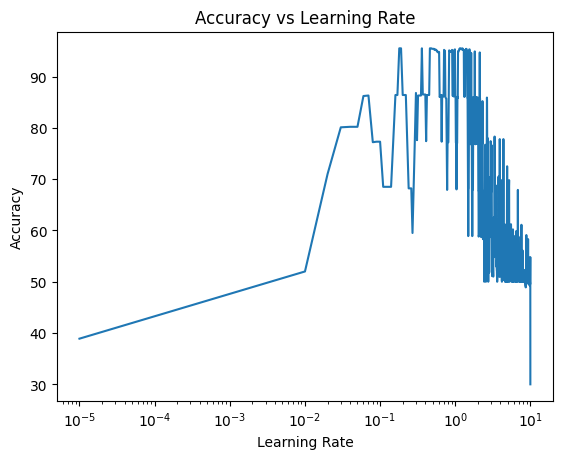

In [41]:
# smoothing function
def smooth(x, k=5):
    return np.convolve(x, np.ones(k) / k, mode="same")

plt.plot(LRS, smooth(accuracies))
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Learning Rate")
plt.xscale("log")
plt.show()